<a href="https://colab.research.google.com/github/ibitoladgr8/Machine-Learning/blob/main/spam_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spam_data = pd.read_csv('/content/spam.tsv', sep ='\t')
spam_data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
spam_data['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
ham = spam_data[spam_data['label'] == 'ham']
spam = spam_data[spam_data['label'] == 'spam']

In [ ]:
ham = ham.sample(spam.shape[0])

data = pd.concat([ham, spam], ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Okay... We wait ah,18,3
1,ham,"see, i knew giving you a break a few times wou...",276,9
2,ham,You'd like that wouldn't you? Jerk!,35,4
3,ham,"Sorry, I'll call later",22,2
4,ham,"Okay. No no, just shining on. That was meant t...",83,5


In [ ]:
data['label_numeric'] = data['label'].map({'ham': 0, 'spam': 1})

correlation = data['label_numeric'].corr(data['length'])

print(f"Correlation between message type and length: {correlation}")

Correlation between message type and length: 0.5628368325298095


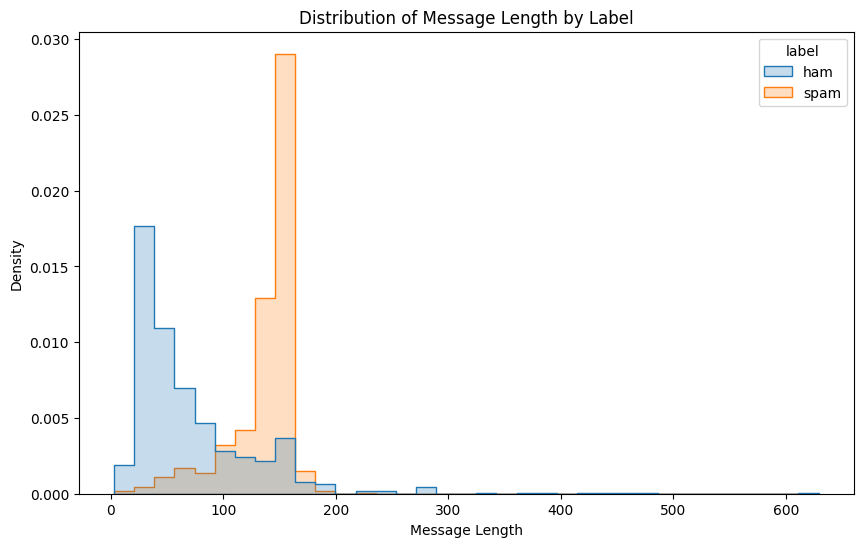

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data=data, x='length', hue='label', element='step', stat='density', common_norm=False)
plt.title('Distribution of Message Length by Label')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['message'],
    data['label_numeric'],
    test_size=0.2,
    random_state=42,shuffle=True,
    stratify=data['label_numeric']
    )

In [ ]:
vectorizer = TfidfVectorizer()
#X_train = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_jobs=-1))])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 13, 136]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       150
           1       1.00      0.91      0.95       149

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299

